In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

#deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#machine learning
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer


#metrics
from sklearn.metrics import accuracy_score

from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [205]:
data = pd.read_csv('mail_data.csv')
df= deepcopy(data)


In [206]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [208]:
df.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

<Axes: xlabel='Category', ylabel='count'>

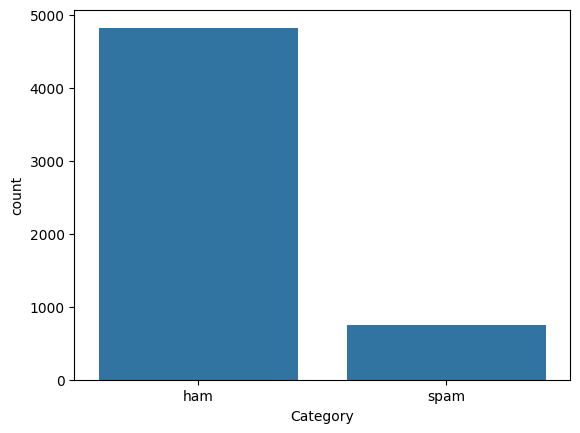

In [209]:
sns.countplot(x='Category', data=df)

In [210]:
ham_msg = df[df.Category =='ham']
spam_msg = df[df.Category=='spam']

In [211]:
ham_msg = ham_msg.sample(n=len(spam_msg),
                         random_state=42)

ham_msg.head()

,Category,Message
3714,ham,If i not meeting ü all rite then i'll go home ...
1311,ham,"I.ll always be there, even if its just in spir..."
548,ham,"Sorry that took so long, omw now"
1324,ham,I thk 50 shd be ok he said plus minus 10.. Did...
3184,ham,Dunno i juz askin cos i got a card got 20% off...


Text(0.5, 0, 'Message types')

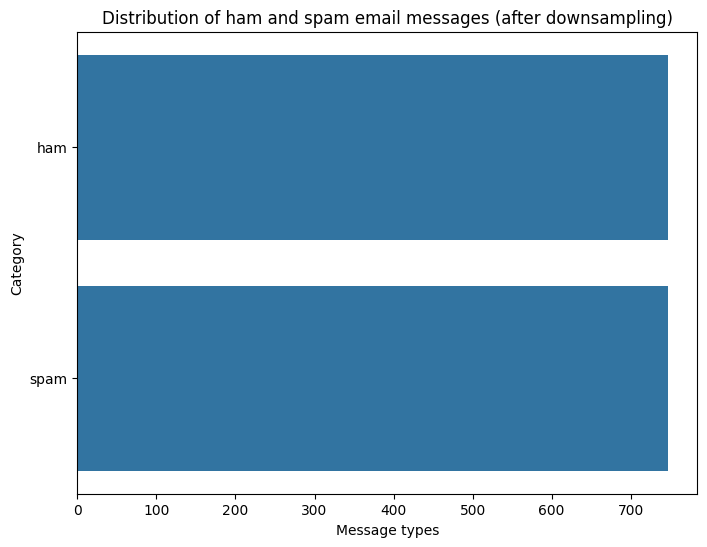

In [212]:
df=pd.concat([ham_msg, spam_msg], ignore_index=True)

plt.figure(figsize=(8,6))
sns.countplot(df.Category)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [213]:
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

df['Message']= df['Message'].apply(lambda x: remove_punctuations(x))
df.head()

,Category,Message
0,ham,If i not meeting ü all rite then ill go home l...
1,ham,Ill always be there even if its just in spirit...
2,ham,Sorry that took so long omw now
3,ham,I thk 50 shd be ok he said plus minus 10 Did ü...
4,ham,Dunno i juz askin cos i got a card got 20 off ...


In [214]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


df['Message'] = df['Message'].apply(lambda text: remove_stopwords(text))
df.head()

,Category,Message
0,ham,meeting ü rite ill go home lor ü dun feel like...
1,ham,ill always even spirit ill get bb soon trying ...
2,ham,sorry took long omw
3,ham,thk 50 shd ok said plus minus 10 ü leave line ...
4,ham,dunno juz askin cos got card got 20 4 salon ca...


In [215]:
df['Category']= df['Category'].map({'spam': 0, 'ham': 1})

In [216]:
x=df['Message']
y=df['Category']

In [217]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [218]:
extracted_features = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_vector= extracted_features.fit_transform(x_train)
x_test_vector= extracted_features.transform(x_test)

In [219]:
print(x_train_vector)

  (0, 1928)	0.2745943055101091
  (0, 1633)	0.3447208275423787
  (0, 1273)	0.25744940329261684
  (0, 2154)	0.6516326195949526
  (0, 1631)	0.30199943412575037
  (0, 3715)	0.2745943055101091
  (0, 821)	0.25744940329261684
  (0, 3730)	0.28631165917132473
  (1, 2138)	0.6228793990971345
  (1, 1981)	0.5246175774006424
  (1, 3236)	0.5803427019121319
  (2, 3121)	0.3317047297530539
  (2, 2175)	0.27362627544625717
  (2, 2220)	0.3557137880901209
  (2, 3426)	0.28592135465860347
  (2, 1440)	0.2508638657591402
  (2, 1124)	0.2794552688753244
  (2, 2241)	0.28153315308194443
  (2, 3506)	0.2882437552087077
  (2, 1341)	0.41379224239691764
  (2, 1873)	0.36362066572580815
  (3, 1513)	0.33976522484490024
  (3, 1351)	0.27840907294737544
  (3, 860)	0.3572138695938052
  (3, 3832)	0.4484399649411468
  :	:
  (1193, 429)	0.31996695790554464
  (1193, 283)	0.2877120080424113
  (1193, 3659)	0.2707559201762103
  (1193, 2128)	0.276892988488257
  (1193, 2180)	0.2407766532818091
  (1193, 1815)	0.23610742450532388
  (1193

In [220]:
naive= MultinomialNB()
svm= SVC()
log= LogisticRegression()


In [221]:
naive.fit(x_train_vector,y_train)

MultinomialNB()

In [222]:
svm.fit(x_train_vector,y_train)

SVC()

In [223]:
log.fit(x_train_vector,y_train)

LogisticRegression()

In [224]:
y_pred_naive= naive.predict(x_test_vector)
y_pred_svm= svm.predict(x_test_vector)
y_pred_log= log.predict(x_test_vector)

In [225]:
y_pred_train_naive= naive.predict(x_train_vector)
y_pred_train_svm= svm.predict(x_train_vector)
y_pred_train_log= log.predict(x_train_vector)

In [226]:
acc_test_naive = accuracy_score(y_pred_naive,y_test)
acc_train_naive=  accuracy_score(y_pred_train_naive,y_train)

acc_test_log = accuracy_score(y_pred_log,y_test)
acc_train_log = accuracy_score(y_pred_train_log,y_train)

acc_test_svm= accuracy_score(y_pred_svm,y_test)
acc_train_svm= accuracy_score(y_pred_train_svm,y_train)

In [227]:
print('naive bayes test accuracy: {} and train accuracy is {} '.format( acc_test_naive, acc_train_naive))

naive bayes test accuracy: 0.9464882943143813 and train accuracy is 0.9866108786610879 


In [228]:
print('Logistic test accuracy: {} and train accuracy is {} '.format(acc_test_log,acc_train_log))

Logistic test accuracy: 0.9331103678929766 and train accuracy is 0.9807531380753138 


In [229]:
print('SVM test accuracy: {} and train accuracy is {} '.format(acc_test_svm,acc_train_svm))

SVM test accuracy: 0.9331103678929766 and train accuracy is 1.0 


## **Deep Learning**

In [230]:
token=Tokenizer(oov_token='<OOV>')
token.fit_on_texts(x_train)

In [231]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'call': 2,
 'u': 3,
 'free': 4,
 '2': 5,
 'ur': 6,
 'txt': 7,
 '4': 8,
 'text': 9,
 'stop': 10,
 'mobile': 11,
 'reply': 12,
 'claim': 13,
 'get': 14,
 'new': 15,
 'send': 16,
 'im': 17,
 'prize': 18,
 'go': 19,
 'cash': 20,
 'please': 21,
 'dont': 22,
 'win': 23,
 'nokia': 24,
 'urgent': 25,
 'know': 26,
 'phone': 27,
 'want': 28,
 '16': 29,
 'service': 30,
 'contact': 31,
 'customer': 32,
 'week': 33,
 'time': 34,
 'ltgt': 35,
 'tone': 36,
 'ill': 37,
 'per': 38,
 'message': 39,
 'back': 40,
 'day': 41,
 'every': 42,
 'got': 43,
 'ok': 44,
 'good': 45,
 'guaranteed': 46,
 'ü': 47,
 'chat': 48,
 '1': 49,
 'love': 50,
 'like': 51,
 '18': 52,
 'number': 53,
 'r': 54,
 'line': 55,
 'receive': 56,
 'draw': 57,
 'camera': 58,
 'see': 59,
 'awarded': 60,
 'box': 61,
 'hi': 62,
 'mins': 63,
 'come': 64,
 'holiday': 65,
 '150ppm': 66,
 'landline': 67,
 'great': 68,
 'pls': 69,
 'latest': 70,
 'award': 71,
 'find': 72,
 'tell': 73,
 '£1000': 74,
 'apply': 75,
 'live': 76,
 'msg':

In [232]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(x_train)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [233]:
Testing_seq=token.texts_to_sequences(x_test)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [234]:
len(max(df.Message))

40

In [235]:
len(word_index)

4132

In [236]:
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(input_dim=len(word_index) + 1,
                                    output_dim=32,
                                    input_length=50),

                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])


model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 50, 32)            132256    
                                                                 
 global_average_pooling1d_5  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 133345 (520.88 KB)
Trainable params: 133345 (520.88 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [237]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

In [238]:

es = EarlyStopping(patience=5,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)



In [239]:
history = model.fit(Trainning_pad, y_train,
                    validation_data=(Testing_pad, y_test),
                    epochs=30,
                    batch_size=32,
                    callbacks=[es]
                   )

Epoch 1/30
38/38 [==============================] - 5s 112ms/step - loss: 0.6892 - accuracy: 0.5305 - val_loss: 0.6837 - val_accuracy: 0.4916
Epoch 2/30
38/38 [==============================] - 2s 60ms/step - loss: 0.6718 - accuracy: 0.5665 - val_loss: 0.6623 - val_accuracy: 0.5585
Epoch 3/30
38/38 [==============================] - 2s 48ms/step - loss: 0.6330 - accuracy: 0.7523 - val_loss: 0.6119 - val_accuracy: 0.7291
Epoch 4/30
38/38 [==============================] - 1s 31ms/step - loss: 0.5490 - accuracy: 0.8368 - val_loss: 0.5248 - val_accuracy: 0.8562
Epoch 5/30
38/38 [==============================] - 1s 33ms/step - loss: 0.4409 - accuracy: 0.9063 - val_loss: 0.4245 - val_accuracy: 0.8963
Epoch 6/30
38/38 [==============================] - 1s 18ms/step - loss: 0.3243 - accuracy: 0.9364 - val_loss: 0.3315 - val_accuracy: 0.9030
Epoch 7/30
38/38 [==============================] - 1s 22ms/step - loss: 0.2353 - accuracy: 0.9464 - val_loss: 0.2673 - val_accuracy: 0.9164
Epoch 8/30
3

In [249]:
score = model.evaluate(Testing_pad, y_test)

score

10/10 [==============================] - 0s 7ms/step - loss: 0.1426 - accuracy: 0.9498


[0.14256644248962402, 0.9498327970504761]

Text(0.5, 0, 'epoch')

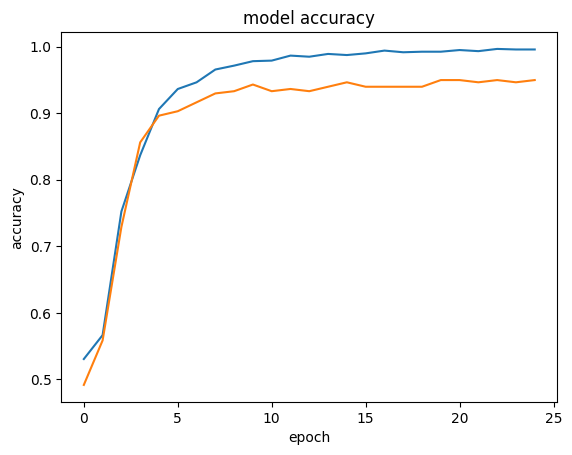

In [241]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'Models')

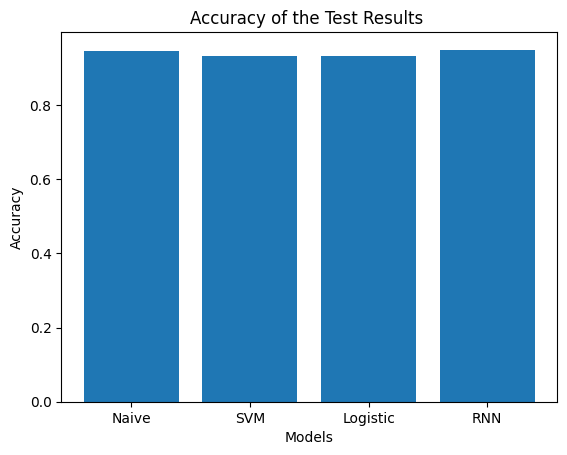

In [250]:
plt.bar(x=['Naive','SVM','Logistic','RNN'],height=[acc_test_naive,acc_test_svm,acc_test_log,score[1]])
plt.title('Accuracy of the Test Results ')
plt.ylabel('Accuracy')
plt.xlabel('Models')